<a href="https://colab.research.google.com/github/Sachiya1999/london-success-academy-aiml-internship/blob/main/week02_insurance_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

df = pd.read_csv("insurance.csv")
df.head()
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [4]:
df.select_dtypes(include=['int64', 'float64']).mean()
df.select_dtypes(include=['int64', 'float64']).median()
df.mode().iloc[0]


,0
age,18
sex,male
bmi,32.3
children,0
smoker,no
region,southeast
charges,1639.5631


<Axes: xlabel='charges', ylabel='Count'>

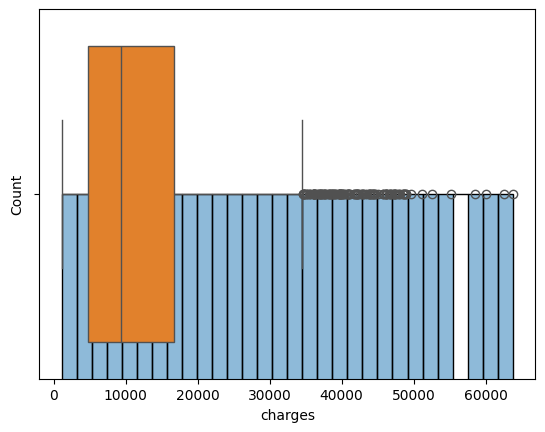

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['charges'], kde=True)
sns.boxplot(x='charges', data=df)


<Axes: xlabel='smoker', ylabel='count'>

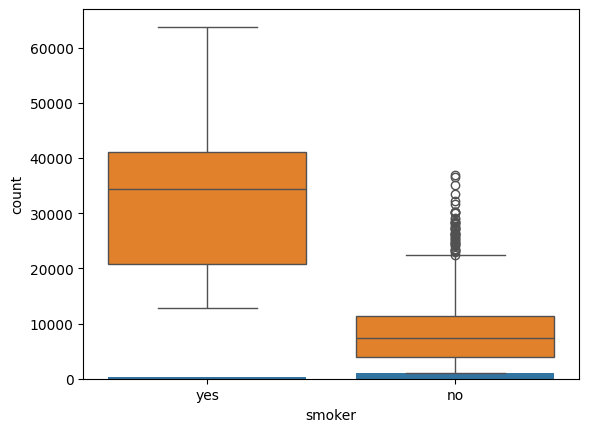

In [6]:
sns.countplot(x='smoker', data=df)
sns.boxplot(x='smoker', y='charges', data=df)


In [7]:
smokers = df[df['smoker'] == 'yes']
non_smokers = df[df['smoker'] == 'no']

smokers['charges'].mean(), smokers['charges'].median()
non_smokers['charges'].mean(), non_smokers['charges'].median()


(np.float64(8434.268297856204), 7345.4053)

For typical cost, I would present the median, as charges are highly skewed. The mean can be distorted by a few extremely high cases. Using mean could lead to underestimating the risk. Among smokers, the average charge is much higher than in non-smokers, but the median better reflects the typical customer cost, highlighting the impact of smoking risk.

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df_encoded = pd.get_dummies(df, drop_first=True)

X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

print("Linear Regression R2:", r2_score(y_test, y_pred_lr))


Linear Regression R2: 0.7835929767120724


In [9]:
from sklearn.tree import DecisionTreeRegressor

model_dt = DecisionTreeRegressor(max_depth=5, random_state=42)
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)

print("Decision Tree R2:", r2_score(y_test, y_pred_dt))


Decision Tree R2: 0.8336098314514943


In [10]:
print("LR MSE:", mean_squared_error(y_test, y_pred_lr))
print("DT MSE:", mean_squared_error(y_test, y_pred_dt))


LR MSE: 33596915.85136145
DT MSE: 25831862.599857908


In [11]:
print("Conclusion:")
print("Decision Tree performed better than Linear Regression in this case.")
print("MSE of DT: {:.2f}".format(mean_squared_error(y_test, y_pred_dt)))
print("MSE of LR: {:.2f}".format(mean_squared_error(y_test, y_pred_lr)))
print("This shows that the data has non-linear relationships that Decision Trees can capture more effectively.")


Conclusion:
Decision Tree performed better than Linear Regression in this case.
MSE of DT: 25831862.60
MSE of LR: 33596915.85
This shows that the data has non-linear relationships that Decision Trees can capture more effectively.
